In [1]:
# deleting the rows having missing values
#data1 = data1.dropna(axis = 0)
#print(data1.isnull().sum())

In [1]:
import pandas as pd
import numpy as np

#standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected = True)
init_notebook_mode(connected = True)
pd.set_option("max_rows",3000)
print("setup complete")

# import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sb


ModuleNotFoundError: No module named 'chart_studio.plotly'

In [2]:
# importing the data
test = pd.read_csv("F:\\projects\\house_price\\Test.csv", index_col = "Id")
train = pd.read_csv("F:\\projects\\house_price\\train.csv", index_col = "Id")


In [3]:
# getting the dimensions of the data
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 79)


In [4]:
# merging the data
data = pd.concat([train,test],join = "outer")
print(data.shape)
display(data)

(2919, 80)


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
2,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
3,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
4,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
5,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,546,546,0,NaN,3,Twnhs,TA,No,0.0,0.0,...,WD,0,Pave,5,546.0,AllPub,0,1970,1970,2006
2916,546,546,0,NaN,3,TwnhsE,TA,No,252.0,0.0,...,WD,0,Pave,6,546.0,AllPub,0,1970,1970,2006
2917,1224,0,0,NaN,4,1Fam,TA,No,1224.0,0.0,...,WD,0,Pave,7,1224.0,AllPub,474,1960,1996,2006


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [6]:
data.describe(include = "all") # missing values found

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,198,2919.000000,2919,2837,2837,2918.000000,2918.000000,...,2918,2919.000000,2919,2919.000000,2918.000000,2917,2919.000000,2919.000000,2919.000000,2919.000000
unique,NaN,NaN,NaN,2,NaN,5,4,4,NaN,NaN,...,9,NaN,2,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Grvl,NaN,1Fam,TA,No,NaN,NaN,...,WD,NaN,Pave,NaN,NaN,AllPub,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,120,NaN,2425,2606,1904,NaN,NaN,...,2525,NaN,2907,NaN,NaN,2916,NaN,NaN,NaN,NaN
mean,1159.581706,336.483727,2.602261,NaN,2.860226,NaN,NaN,NaN,441.423235,49.582248,...,NaN,16.062350,NaN,6.451524,1051.777587,NaN,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,NaN,0.822693,NaN,NaN,NaN,455.610826,169.205611,...,NaN,56.184365,NaN,1.569379,440.766258,NaN,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,0.000000,...,NaN,0.000000,NaN,2.000000,0.000000,NaN,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,NaN,2.000000,NaN,NaN,NaN,0.000000,0.000000,...,NaN,0.000000,NaN,5.000000,793.000000,NaN,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,NaN,3.000000,NaN,NaN,NaN,368.500000,0.000000,...,NaN,0.000000,NaN,6.000000,989.500000,NaN,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,NaN,3.000000,NaN,NaN,NaN,733.000000,0.000000,...,NaN,0.000000,NaN,7.000000,1302.000000,NaN,168.000000,2001.000000,2004.000000,2009.000000


In [7]:
#Extracing the column names having missing values
(((data.isnull().sum())/len(data))*100).sort_values(ascending = False) 
#PoolQC           99.657417
#MiscFeature      96.402878
#Alley            93.216855
# Fence            80.438506

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
                  ...    
KitchenAbvGr     0.000000
HouseStyle       0.000000
HeatingQC        0.000000
Heating          0.000000
1stFlrSF         0.000000
Length: 80, dtype: float64

In [8]:
# columns having more than 70% null values are being removed since they do not have enough information 
data1 = data.drop(["PoolQC","MiscFeature","Alley","Fence"], axis = 1)
display(data1.columns)

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscVal',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       

In [9]:
# treating the numerical rows having missing values
# LotFrontage 
#data1["LotFrontage"] = data.LotFrontage.fillna(data["LotFrontage"].mean())
#data1.loc[pd.isnull(data1['LotFrontage']),['LotFrontage']]=data1["LotFrontage"].interpolate()
data1["LotFrontage"] = data.LotFrontage.fillna(data["LotFrontage"].interpolate())
data1.LotFrontage.isnull().sum()

0

In [10]:
data1.shape

(2919, 76)

In [11]:
#univariate analyses
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
data1["MSSubClass"].value_counts().plot(kind="bar")
plt.xlabel("MSSubClass")

plt.subplot(222)
data1["MSZoning"].value_counts().plot(kind="bar")
plt.xlabel("MSZoning")

plt.subplot(223)
data1["Street"].value_counts().plot(kind="bar")
plt.xlabel("Street")

plt.subplot(224)
data1["LotShape"].value_counts().plot(kind="bar")
plt.xlabel("LotShape")

NameError: name 'plt' is not defined

In [12]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace = 1)
plt.subplot(211)
data1["LandContour"].value_counts().plot(kind="bar")
plt.xlabel("LandContour")

plt.subplot(212)
data1["Utilities"].value_counts().plot(kind="bar")
plt.xlabel("Utilities")

NameError: name 'plt' is not defined

In [13]:
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["LotConfig"].value_counts().plot(kind="bar")
plt.xlabel("LotConfig")

plt.subplot(222)
data1["LandSlope"].value_counts().plot(kind="bar")
plt.xlabel("LandSlope")

plt.subplot(223)
data1["Neighborhood"].value_counts().plot(kind="bar")
plt.xlabel("Neighborhood")

plt.subplot(224)
data1["Condition1"].value_counts().plot(kind="bar")
plt.xlabel("Condition1")

NameError: name 'plt' is not defined

In [ ]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace = 1)

plt.subplot(211)
data1["Condition2"].value_counts().plot(kind="bar")
plt.xlabel("Condition2")

plt.subplot(212)
data1["BldgType"].value_counts().plot(kind="bar")
plt.xlabel("BldgType")


In [14]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["OverallQual"].value_counts().plot(kind="bar")
plt.xlabel("OverallQual")

plt.subplot(222)
data1["OverallCond"].value_counts().plot(kind="bar")
plt.xlabel("OverallCond")

plt.subplot(223)
data1["RoofStyle"].value_counts().plot(kind="bar")
plt.xlabel("RoofStyle")

plt.subplot(224)
data1["RoofMatl"].value_counts().plot(kind="bar")
plt.xlabel("RoofMatl")

NameError: name 'plt' is not defined

In [15]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["Exterior1st"].value_counts().plot(kind="bar")
plt.xlabel("Exterior1st")

plt.subplot(222)
data1["Exterior2nd"].value_counts().plot(kind="bar")
plt.xlabel("Exterior2nd")

plt.subplot(223)
data1["MasVnrType"].value_counts().plot(kind="bar")
plt.xlabel("MasVnrType")

plt.subplot(224)
data1["ExterQual"].value_counts().plot(kind="bar")
plt.xlabel("ExterQual")


NameError: name 'plt' is not defined

Text(0.5, 0, 'BsmtCond')

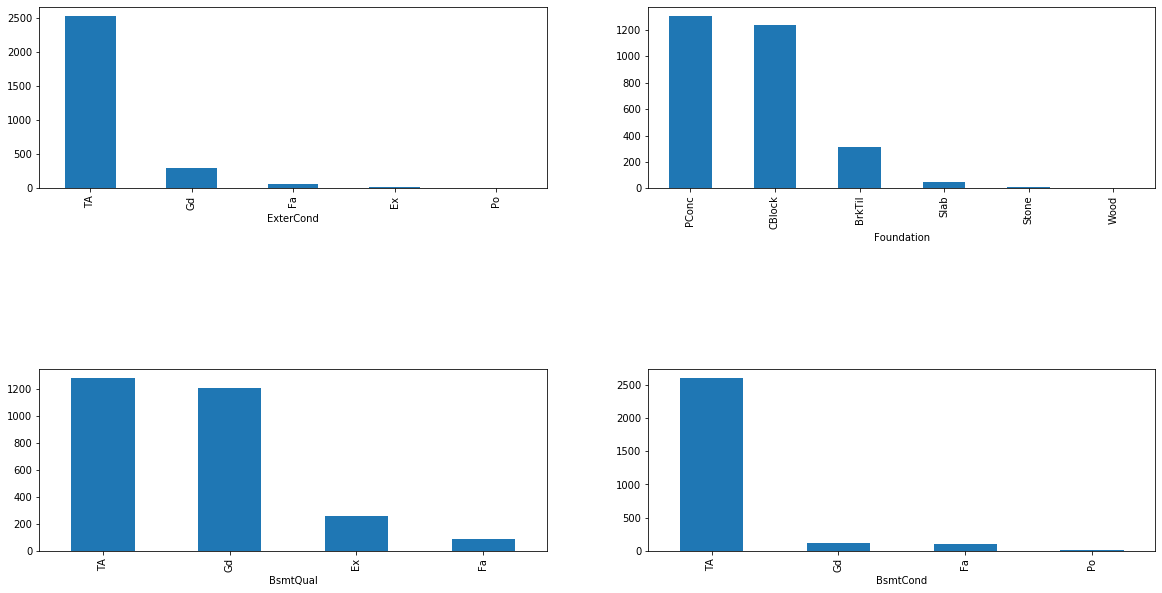

In [54]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["ExterCond"].value_counts().plot(kind="bar")
plt.xlabel("ExterCond")

plt.subplot(222)
data1["Foundation"].value_counts().plot(kind="bar")
plt.xlabel("Foundation")

plt.subplot(223)
data1["BsmtQual"].value_counts().plot(kind="bar")
plt.xlabel("BsmtQual")

plt.subplot(224)
data1["BsmtCond"].value_counts().plot(kind="bar")
plt.xlabel("BsmtCond")

Text(0.5, 0, 'Heating')

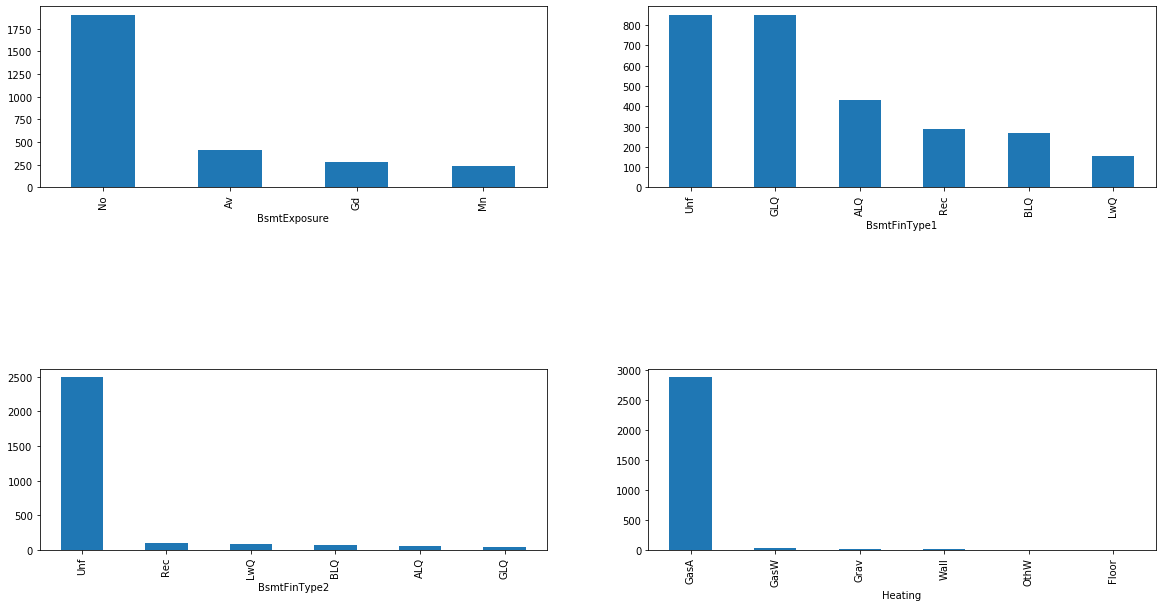

In [55]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["BsmtExposure"].value_counts().plot(kind="bar")
plt.xlabel("BsmtExposure")
#rename NO and No

plt.subplot(222)
data1["BsmtFinType1"].value_counts().plot(kind="bar")
plt.xlabel("BsmtFinType1")
#rename NO

plt.subplot(223)
data1["BsmtFinType2"].value_counts().plot(kind="bar")
plt.xlabel("BsmtFinType2")
#rename NO

plt.subplot(224)
data1["Heating"].value_counts().plot(kind="bar")
plt.xlabel("Heating")


Text(0.5, 0, 'HeatingQC')

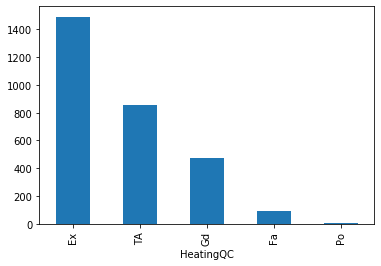

In [56]:
data1["HeatingQC"].value_counts().plot(kind="bar")
plt.xlabel("HeatingQC")


Text(0.5, 0, 'BsmtHalfBath')

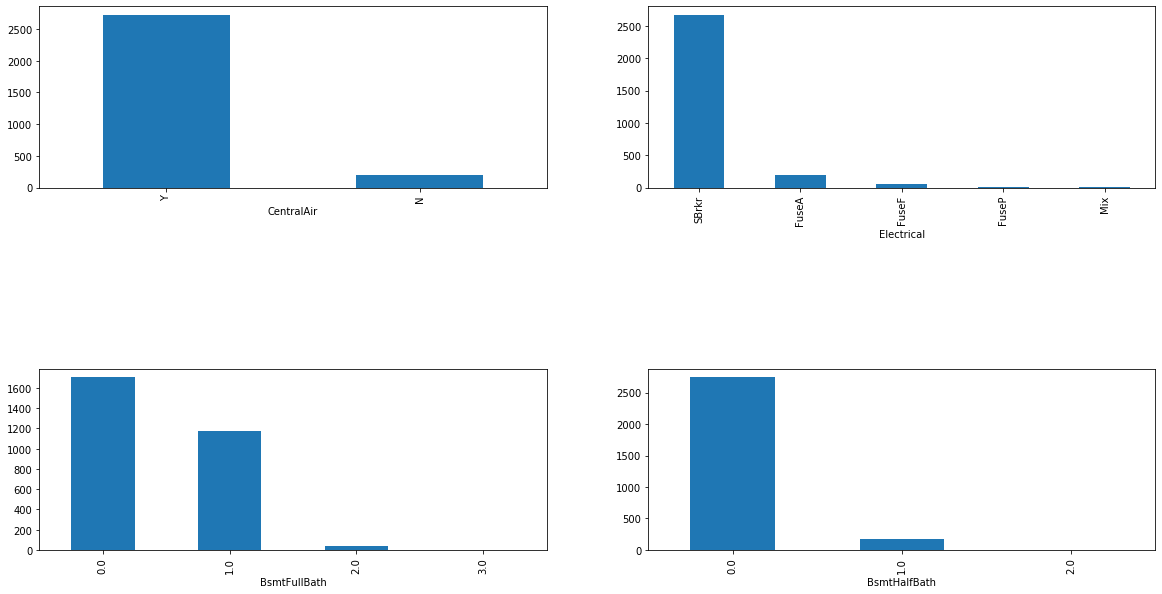

In [57]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["CentralAir"].value_counts().plot(kind="bar")
plt.xlabel("CentralAir")

plt.subplot(222)
data1["Electrical"].value_counts().plot(kind="bar")
plt.xlabel("Electrical")

plt.subplot(223)
data1["BsmtFullBath"].value_counts().plot(kind="bar")
plt.xlabel("BsmtFullBath")

plt.subplot(224)
data1["BsmtHalfBath"].value_counts().plot(kind="bar")
plt.xlabel("BsmtHalfBath")

Text(0.5, 0, 'KitchenAbvGr')

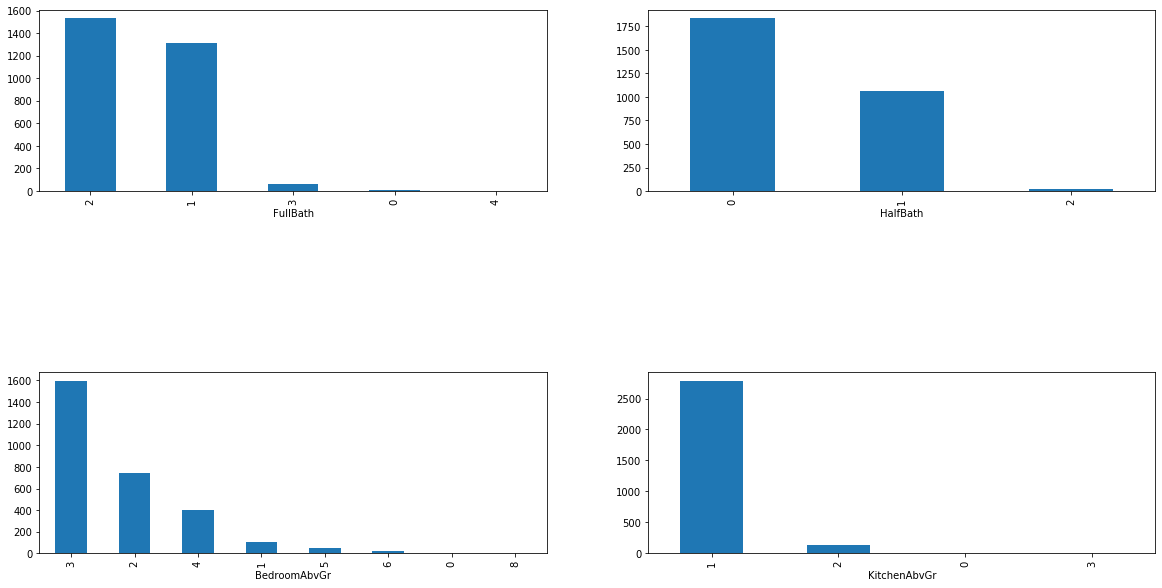

In [58]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["FullBath"].value_counts().plot(kind="bar")
plt.xlabel("FullBath")

plt.subplot(222)
data1["HalfBath"].value_counts().plot(kind="bar")
plt.xlabel("HalfBath")

plt.subplot(223)
data1["BedroomAbvGr"].value_counts().plot(kind="bar")
plt.xlabel("BedroomAbvGr")

plt.subplot(224)
data1["KitchenAbvGr"].value_counts().plot(kind="bar")
plt.xlabel("KitchenAbvGr")

Text(0.5, 0, 'Fireplaces')

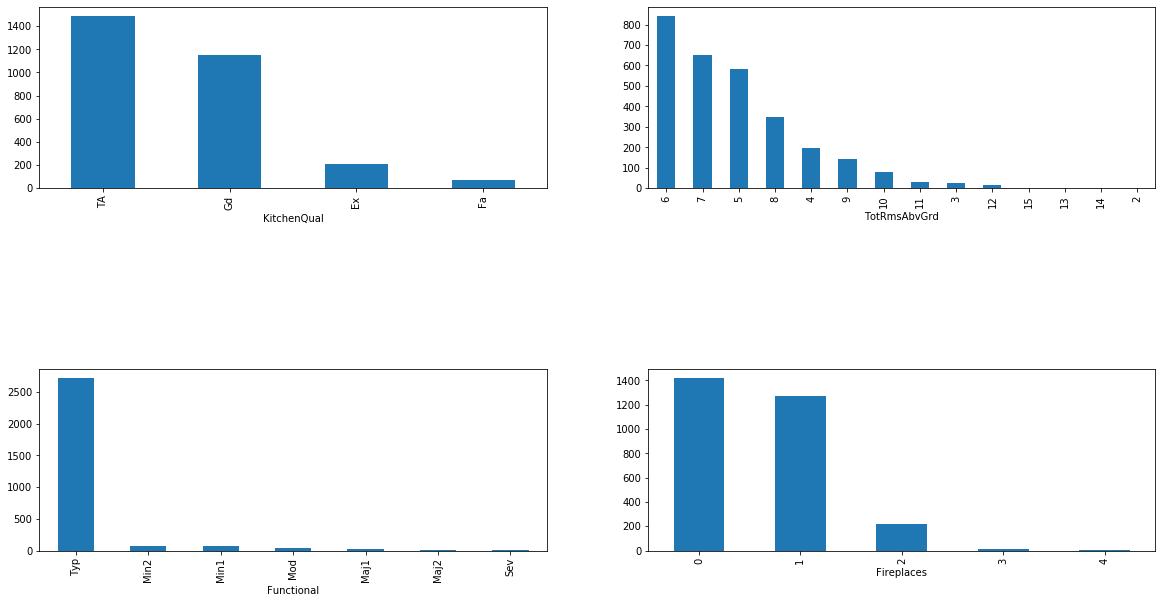

In [59]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["KitchenQual"].value_counts().plot(kind="bar")
plt.xlabel("KitchenQual")

plt.subplot(222)
data1["TotRmsAbvGrd"].value_counts().plot(kind="bar")
plt.xlabel("TotRmsAbvGrd")

plt.subplot(223)
data1["Functional"].value_counts().plot(kind="bar")
plt.xlabel("Functional")

plt.subplot(224)
data1["Fireplaces"].value_counts().plot(kind="bar")
plt.xlabel("Fireplaces")

Text(0.5, 0, 'GarageFinish')

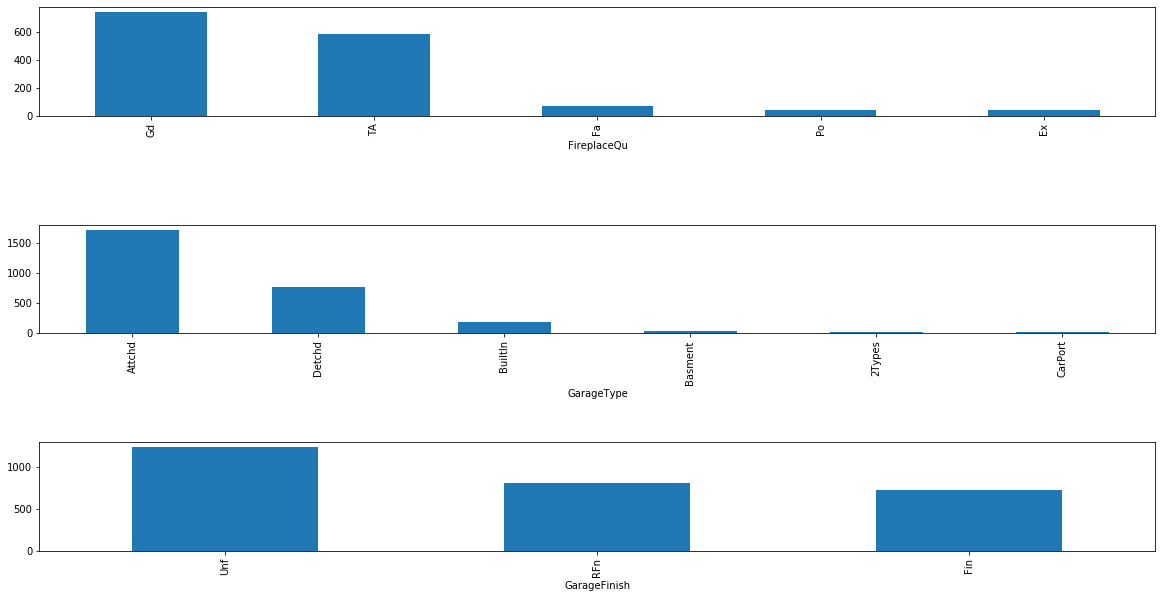

In [60]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(311)
data1["FireplaceQu"].value_counts().plot(kind="bar")
plt.xlabel("FireplaceQu")
#rename NO

plt.subplot(312)
data1["GarageType"].value_counts().plot(kind="bar")
plt.xlabel("GarageType")
#rename NO

plt.subplot(313)
data1["GarageFinish"].value_counts().plot(kind="bar")
plt.xlabel("GarageFinish")
#rename NO

Text(0.5, 0, 'GarageYrBlt (from 1900s)')

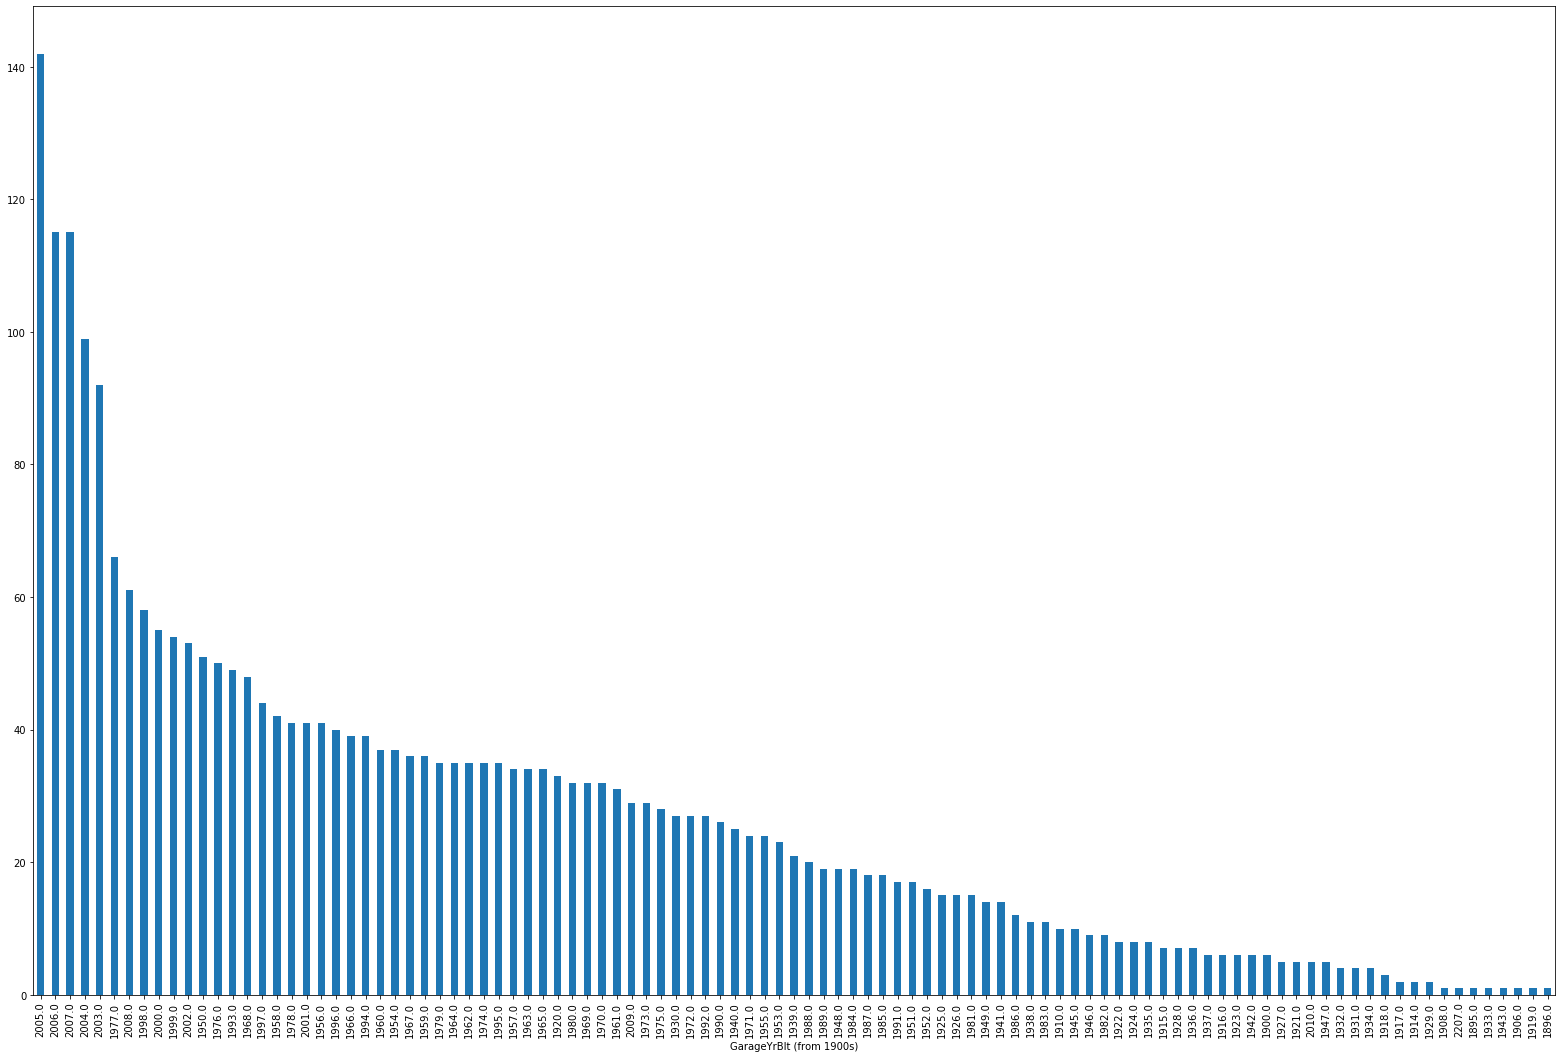

In [61]:
plt.figure(figsize=(60,40))

plt.subplot(224)
data1["GarageYrBlt"].value_counts().plot(kind="bar")
plt.xlabel("GarageYrBlt (from 1900s)")

Text(0.5, 0, 'PavedDrive')

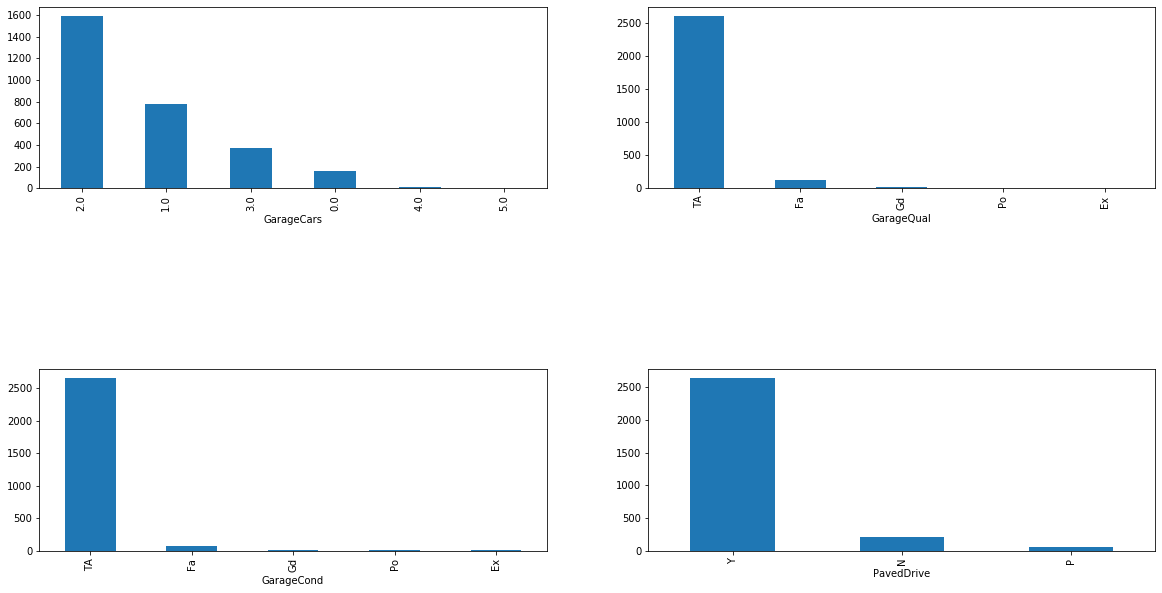

In [62]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)
plt.subplot(221)
data1["GarageCars"].value_counts().plot(kind="bar")
plt.xlabel("GarageCars")
#rename 0

plt.subplot(222)
data1["GarageQual"].value_counts().plot(kind="bar")
plt.xlabel("GarageQual")
#rename NO

plt.subplot(223)
data1["GarageCond"].value_counts().plot(kind="bar")
plt.xlabel("GarageCond")
#rename NO

plt.subplot(224)
data1["PavedDrive"].value_counts().plot(kind="bar")
plt.xlabel("PavedDrive")


Text(0.5, 0, 'SaleCondition')

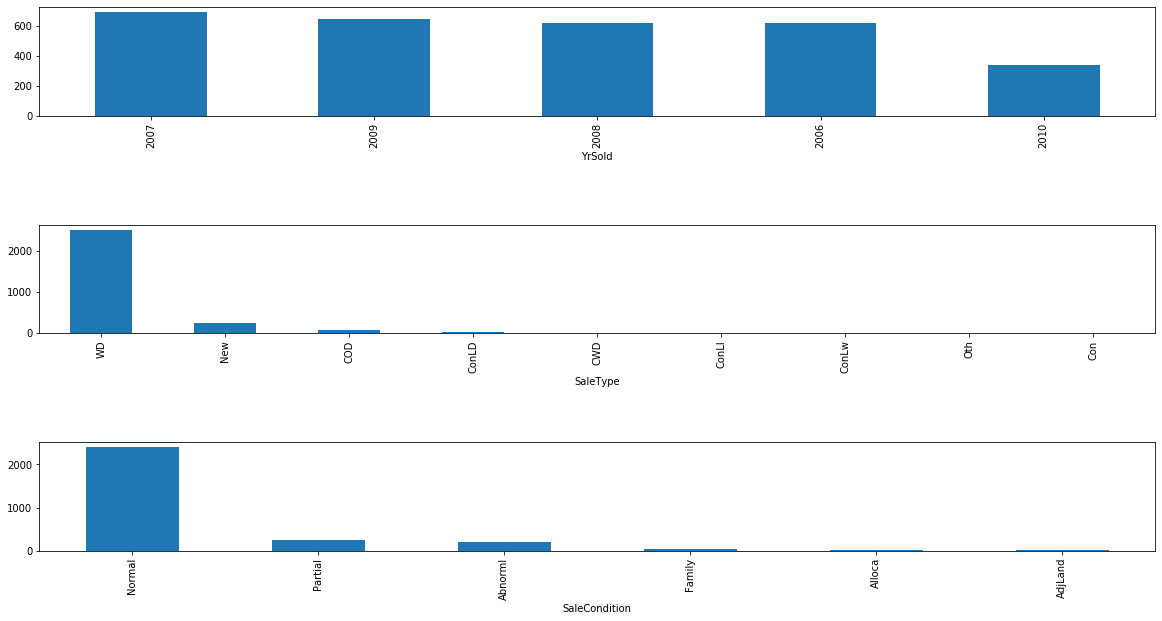

In [63]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(311)
data1["YrSold"].value_counts().plot(kind="bar")
plt.xlabel("YrSold")

plt.subplot(312)
data1["SaleType"].value_counts().plot(kind="bar")
plt.xlabel("SaleType")
#rename othr

plt.subplot(313)
data1["SaleCondition"].value_counts().plot(kind="bar")
plt.xlabel("SaleCondition")


Text(0.5, 0, 'BsmtFinSF2')

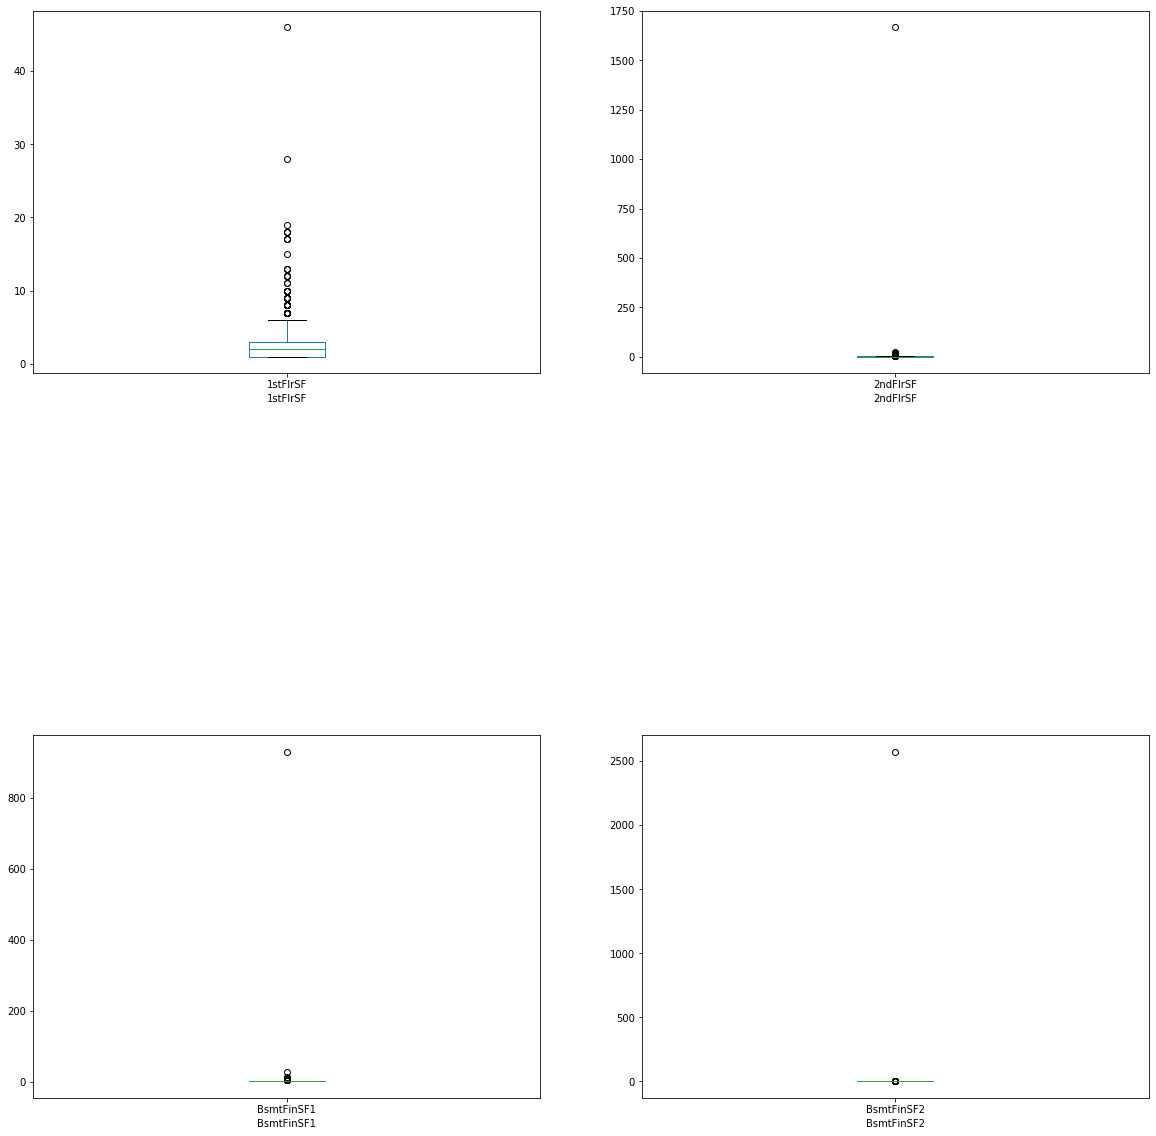

In [64]:
plt.figure(figsize = (20,20))
plt.subplots_adjust(hspace =1)

plt.subplot(221)
data1["1stFlrSF"].value_counts().plot(kind = "box")
plt.xlabel("1stFlrSF")

plt.subplot(222)
data1["2ndFlrSF"].value_counts().plot(kind = "box")
plt.xlabel("2ndFlrSF")

plt.subplot(223)
data1["BsmtFinSF1"].value_counts().plot(kind = "box")
plt.xlabel("BsmtFinSF1")

plt.subplot(224)
data1["BsmtFinSF2"].value_counts().plot(kind = "box")
plt.xlabel("BsmtFinSF2")


Text(0.5, 0, 'Fireplaces')

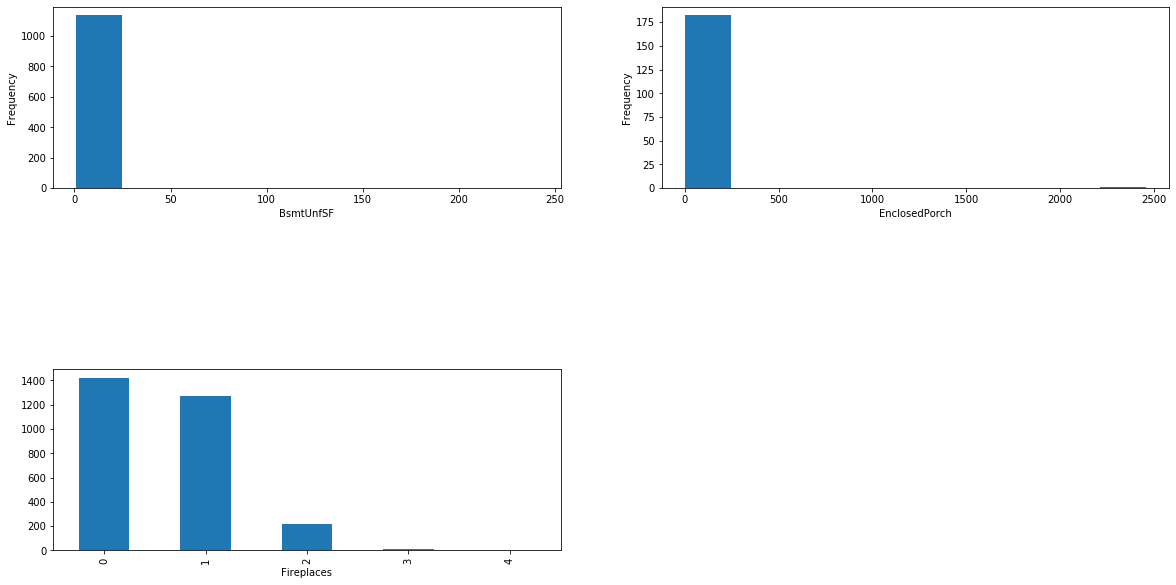

In [65]:
plt.figure(figsize =(20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["BsmtUnfSF"].value_counts().plot(kind = "hist")
plt.xlabel("BsmtUnfSF")

plt.subplot(222)
data1["EnclosedPorch"].value_counts().plot(kind = "hist")
plt.xlabel("EnclosedPorch")

plt.subplot(223)
data1["Fireplaces"].value_counts().plot(kind = "bar")
plt.xlabel("Fireplaces")

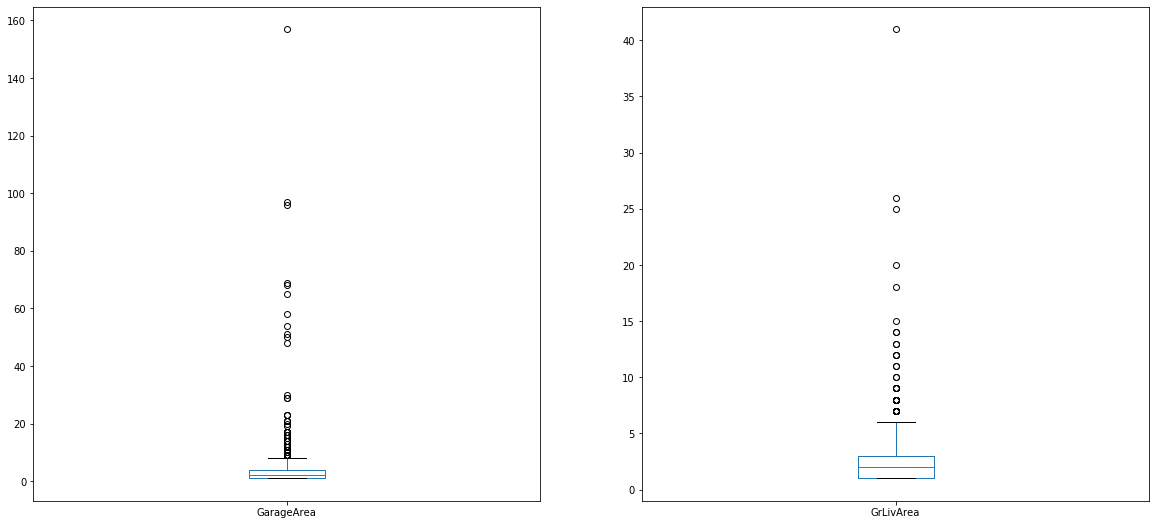

In [66]:
plt.figure(figsize = (20,20))

plt.subplot(221)
data1["GarageArea"].value_counts().plot(kind = "box") #outliers

plt.subplot(222)
data1["GrLivArea"].value_counts().plot(kind = "box")#outliers

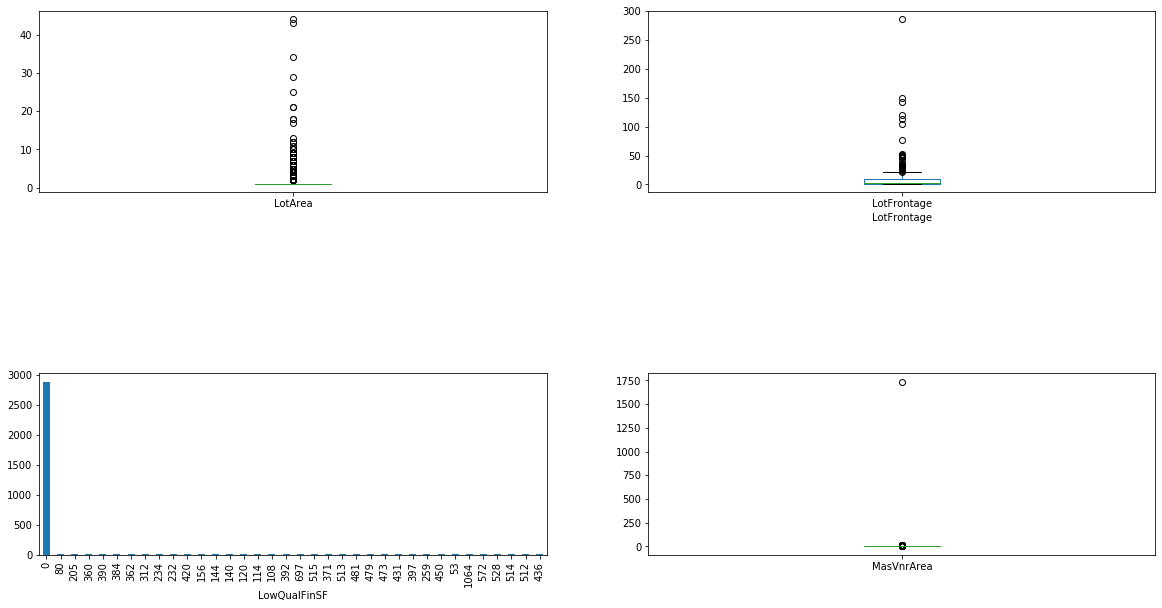

In [67]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["LotArea"].value_counts().plot(kind = "box")

plt.subplot(222)
data1["LotFrontage"].value_counts().plot(kind = "box")
plt.xlabel("LotFrontage")

plt.subplot(223)
data1["LowQualFinSF"].value_counts().plot(kind = "bar")
plt.xlabel("LowQualFinSF")

plt.subplot(224)
data1["MasVnrArea"].value_counts().plot(kind = "box")

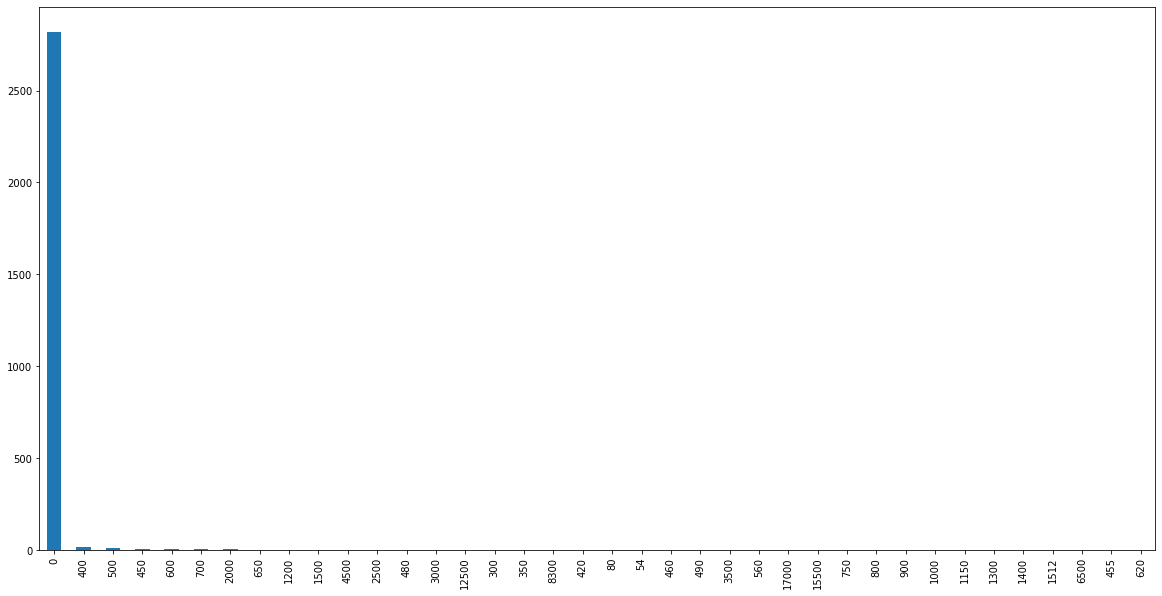

In [68]:
plt.figure(figsize = (20,10))

data1["MiscVal"].value_counts().plot(kind = "bar")

Text(0.5, 0, 'PoolArea')

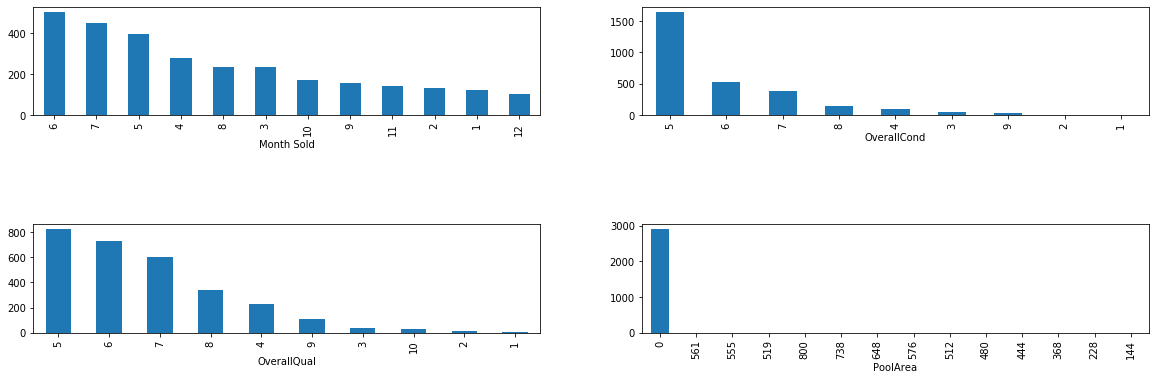

In [69]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(321)
data1["MoSold"].value_counts().plot(kind = "bar")
plt.xlabel("Month Sold")

plt.subplot(322)
data1["OverallCond"].value_counts().plot(kind = "bar")
plt.xlabel("OverallCond")

plt.subplot(323)
data1["OverallQual"].value_counts().plot(kind = "bar")
plt.xlabel("OverallQual")

plt.subplot(324)
data1["PoolArea"].value_counts().plot(kind = "bar")
plt.xlabel("PoolArea")


Text(0.5, 0, 'ScreenPorch')

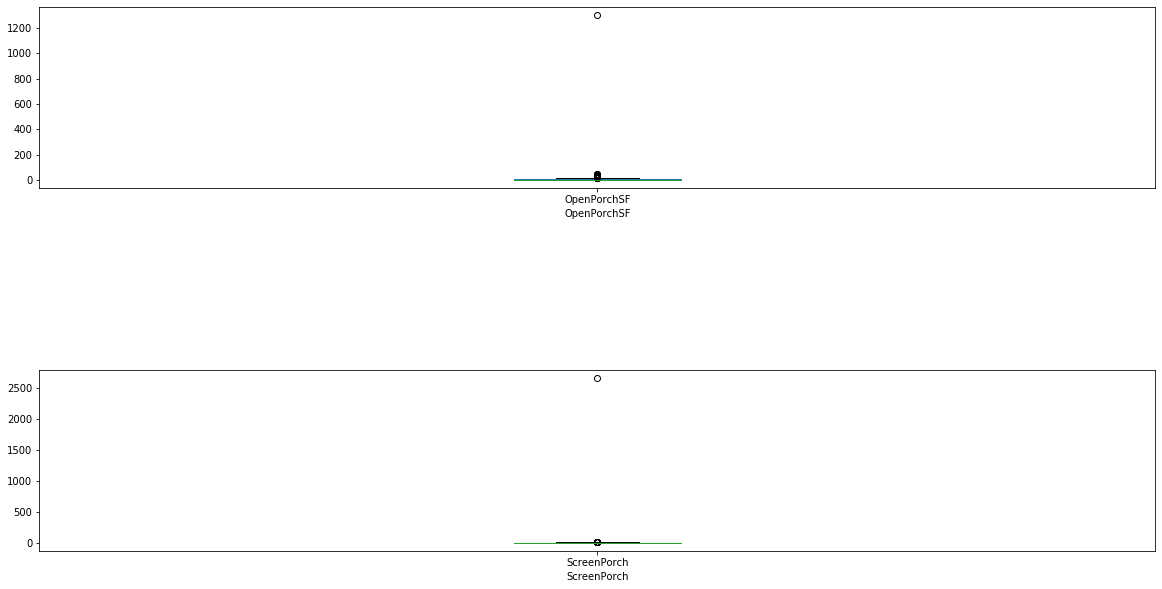

In [70]:
plt.figure(figsize = (20,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(211)
data1["OpenPorchSF"].value_counts().plot(kind = "box")
plt.xlabel("OpenPorchSF")

plt.subplot(212)
data1["ScreenPorch"].value_counts().plot(kind = "box")
plt.xlabel("ScreenPorch")



Text(0.5, 0, 'YearRemodAdd')

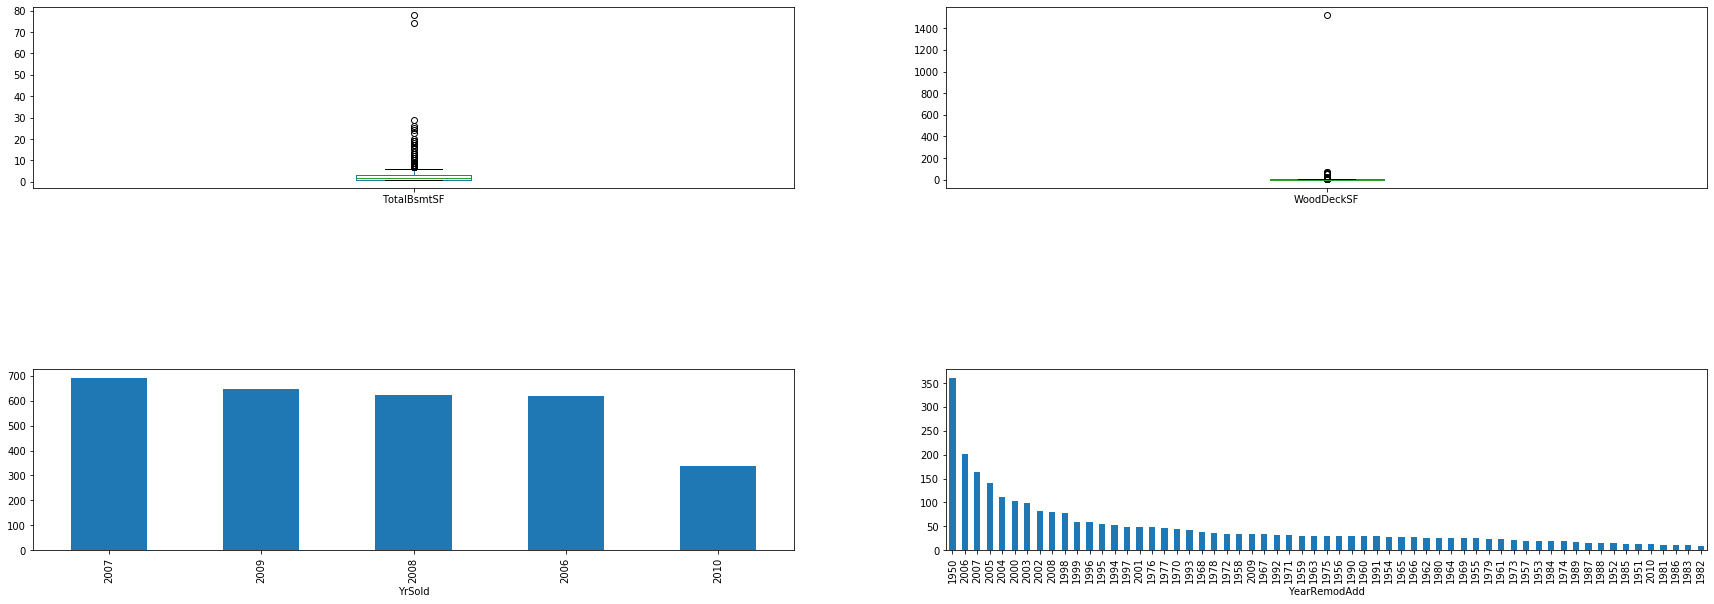

In [71]:
plt.figure(figsize = (30,10))
plt.subplots_adjust(hspace = 1)

plt.subplot(221)
data1["TotalBsmtSF"].value_counts().plot(kind = "box")

plt.subplot(222)
data1["WoodDeckSF"].value_counts().plot(kind = "box")

plt.subplot(223)
data1["YrSold"].value_counts().plot(kind = "bar")
plt.xlabel("YrSold")

plt.subplot(224)
data1["YearRemodAdd"].value_counts().plot(kind = "bar")
plt.xlabel("YearRemodAdd")


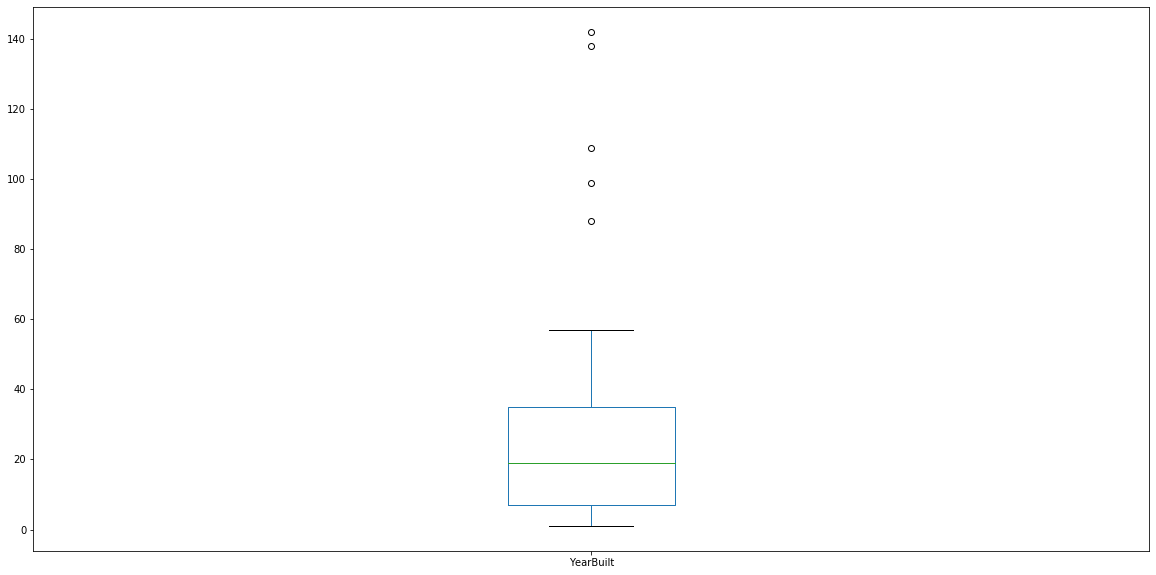

In [72]:
plt.figure(figsize = (20,10))

data1["YearBuilt"].value_counts().plot(kind = "box")

In [73]:
#Bivariate Analysis
#In the following cells, we're trying to find out the relationship between the target variable ( SalePrice) and the other variables present in the data. Heatmap has been used for calculating the correlation between SalePrice and other numeric variables.


In [16]:
# calculating pearson correlation 
numeric = ["float64","int64"]
data_numeric = data1.select_dtypes(include = numeric)
data_numeric_corr = data_numeric.corr(method = "pearson")


In [17]:
# creating a heatmap
fig = go.Figure(data = go.Heatmap(z = np.round(data_numeric_corr,2),
                                  x = data_numeric.columns,y = data_numeric.columns  ))
fig.update_layout(height = 800, width = 800)
fig.show()

#### NEED TO NOTE DOWN THE HIGH CORRELATION VARIABLES AGAINST SALEPRICE

NameError: name 'go' is not defined

In [ ]:
#We shall see the relationship between SalePrice(target variable) with non-numeric variales present in the data.
# Comparison of attributes with SalePrice with the help of subplots
# Character and categorical variables analyses

from plotly.subplots import make_subplots
fig = make_subplots(rows =2, cols =4,shared_yaxes= True,
                    specs = [[{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                             [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]]# ,
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                            # [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]],
#subplot_titles =("Plot1","Plot2","Plot3","Plot4","Plot5","Plot6","Plot7","Plot8")
                    #,
#                 "Plot9","Plot10","Plot11","Plot12",
#                 "Plot13","Plot14","Plot15","Plot16",
#                 "Plot17","Plot18","Plot19"))
                       

fig.add_trace(
    go.Bar(x = data1['BldgType'], y= data1['SalePrice'],
          marker_color = "Violet",marker_line_color="Violet"),
    row = 1, col=1
)


fig.add_trace(
    go.Bar(x = data1['BsmtCond'],y = data1["SalePrice"],
               marker_line_color = "green"),
    row =1,col =2
)

fig.add_trace(
    go.Bar(x = data1['BsmtExposure'],y = data1["SalePrice"],
          marker_line_color = "red"),
    row =1,col = 3
)

fig.add_trace(
    go.Bar(x = data1['BsmtFinType1'],y = data1["SalePrice"],
          marker_color = "lightblue",marker_line_color = "lightblue"),
    row = 1,col=4
)

fig.add_trace(
    go.Bar(x = data1['BsmtFinType2'],y= data1["SalePrice"],
          marker_color = "lightgreen",marker_line_color = "lightgreen"),
    row =2,col=1
)

fig.add_trace(
    go.Bar(x = data1['BsmtQual'],y = data1["SalePrice"],
          marker_color = "indigo",marker_line_color = "indigo"),
    row =2,col=2
)

fig.add_trace(
    go.Bar(x = data1['CentralAir'], y= data1["SalePrice"],
             marker_line_color = "darkgreen"),
    row =2,col =3
)

fig.add_trace(
    go.Bar(x = data1['Condition1'], y= data1["SalePrice"],
              marker_line_color = "lightgreen"),
    row=2,col=4
)

# updating x axis properties
fig.update_xaxes(title_text = "Building Type", row=1,col=1)
fig.update_xaxes(title_text = "Basement Condition", row=1,col=2)
fig.update_xaxes(title_text = "Basement Exposure",row=1,col=3)
fig.update_xaxes(title_text = "Bsmt type1 finished sq.ft.",row=1,col=4)
fig.update_xaxes(title_text = "Bsmt type2 finished sq.ft.",row=2,col=1)
fig.update_xaxes(title_text = "Basement Quality",row=2,col=2)
fig.update_xaxes(title_text = "Central Air Conditioning",row=2,col=3,tickangle =-45)
fig.update_xaxes(title_text = "Main-road/rail Proximity",row=2,col=4,tickangle =-45)

fig.update_layout(height =800,width =1000, title_text ="Saleprice according to house features", template = "ggplot2")
fig.show()



In [ ]:
# Comparison of attributes with SalePrice with the help of subplots
# Character and categorical variables analyses
from plotly.subplots import make_subplots
fig = make_subplots(rows =2, cols =4,shared_yaxes= True,
                    specs = [[{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                             [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]],
                    subplot_titles =("Plot1","Plot2","Plot3","Plot4",
                 "Plot5","Plot6","Plot7","Plot8"))

fig.add_trace(
    go.Bar(x = data1['Condition2'],y= data1["SalePrice"],
          marker_line_color = "blue"),
    row=1,col=1
)

fig.add_trace(
    go.Bar(x = data1['Electrical'],y = data1["SalePrice"],
          marker_color = "pink", marker_line_color = "pink"),
    row=1,col=2
)

fig.add_trace(
    go.Bar(x = data1['ExterCond'],y= data1["SalePrice"],
          marker_color = "darkblue",marker_line_color = "darkblue"),
    row=1,col=3
)

fig.add_trace(
    go.Bar(x = data1['ExterQual'],y= data1["SalePrice"],
          marker_color = "crimson",marker_line_color = "crimson"),
    row=1,col=4
)

fig.add_trace(
    go.Bar(x = data1['Exterior1st'],y= data1["SalePrice"],
          marker_line_color = "green"),
    row=2,col=1
)

fig.add_trace(
    go.Bar(x = data1['Exterior2nd'],y= data1["SalePrice"],
             marker_color = "violet", marker_line_color = "violet" ),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x = data1['FireplaceQu'],y= data1["SalePrice"],
          marker_line_color = "pink"),
    row=2,col=3
)

fig.add_trace(
    go.Bar(x = data1['Foundation'],y= data1["SalePrice"],
          marker_color = "chocolate",marker_line_color = "chocolate"),
    row=2,col=4
)
    
# updating x axis properties
fig.update_xaxes(title_text = "2nd Main-road/rail Proximity",row=1,col=1)
fig.update_xaxes(title_text = "Electrical",row=1,col=2)
fig.update_xaxes(title_text = "External Condition",row=1,col=3)
fig.update_xaxes(title_text = "Exterior Quality",row=1,col=4)
fig.update_xaxes(title_text = "Exterior covering",row=2,col=1)
fig.update_xaxes(title_text = "Exterior Covering(if >1)",row=2,col=2)
fig.update_xaxes(title_text = "Fireplace Quality",row=2,col=3)
fig.update_xaxes(title_text = "Foundation",row=2,col=4)

fig.update_layout(height =800,width =1000, title_text ="Saleprice according to house features", template = "ggplot2")
fig.show()



In [ ]:
# Comparison of attributes with SalePrice with the help of subplots
# Character and categorical variables analyses
from plotly.subplots import make_subplots
fig = make_subplots(rows =2, cols =4,shared_yaxes= True,
                    specs = [[{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                             [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]],
                    subplot_titles =("Plot1","Plot2","Plot3","Plot4",
                 "Plot5","Plot6","Plot7","Plot8"))

fig.add_trace(
    go.Bar(x = data1['Functional'],y= data1["SalePrice"],
          marker_color = "red",marker_line_color = "red"),
    row=1,col=1
)

fig.add_trace(
    go.Bar(x = data1['GarageCond'],y= data1["SalePrice"],
          marker_color = "orange",marker_line_color = "orange"),
    row=1,col=2
)

fig.add_trace(
    go.Bar(x = data1['GarageFinish'],y= data1["SalePrice"],
          marker_color = "violet",marker_line_color = "violet"),
    row=1,col=3
)

fig.add_trace(
    go.Bar(x = data1['GarageQual'],y= data1["SalePrice"],
          marker_color = "green",marker_line_color = "green"),
    row=1,col=4
)

fig.add_trace(
    go.Bar(x = data1['GarageType'],y= data1["SalePrice"],
          marker_line_color = "turquoise"),
    row=2,col=1
)

fig.add_trace(
    go.Bar(x = data1['Heating'],y= data1["SalePrice"],
          marker_line_color = "darkgreen"),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x = data1['HeatingQC'],y= data1["SalePrice"],
          marker_line_color = "lightgreen"),
    row=2,col=3
)

fig.add_trace(
    go.Bar(x = data1['HouseStyle'],y= data1["SalePrice"],
          marker_line_color = "blue"),
    row=2,col=4
)
# updating x axis properties
fig.update_xaxes(title_text = "Functional",row=1,col=1)
fig.update_xaxes(title_text = "Garage Condition",row=2,col=2)
fig.update_xaxes(title_text = "Garage Finish",row=2,col=3)
fig.update_xaxes(title_text = "Garage Quality",row=2,col=4)
fig.update_xaxes(title_text = "Garage Type",row=2,col=1)
fig.update_xaxes(title_text = "Heating",row=2,col=2)
fig.update_xaxes(title_text = "Heating Quality",row=2,col=3)
fig.update_xaxes(title_text = "House Style",row=2,col=4)

fig.update_layout(height =800,width =1000, title_text ="Saleprice according to house features", template = "ggplot2")
fig.show()



In [ ]:
# Comparison of attributes with SalePrice with the help of subplots
# Character and categorical variables analyses
from plotly.subplots import make_subplots
fig = make_subplots(rows =2, cols =4,shared_yaxes= True,
                    specs = [[{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                             [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]],
                    subplot_titles =("Plot1","Plot2","Plot3","Plot4",
                 "Plot5","Plot6","Plot7","Plot8"))

fig.add_trace(
    go.Bar(x = data1['KitchenQual'],y= data1["SalePrice"],
          marker_color = "violet",marker_line_color = "violet"),
    row=1,col=1
)

fig.add_trace(
    go.Bar(x = data1['LandContour'],y= data1["SalePrice"],
          marker_line_color = "darkgreen"),
    row=1,col=2
)

fig.add_trace(
    go.Bar(x = data1['LandSlope'],y= data1["SalePrice"],
          marker_line_color = "green"),
    row=1,col=3
)

fig.add_trace(
    go.Bar(x = data1['LotConfig'],y= data1["SalePrice"],
          marker_line_color = "blue"),
    row=1,col=4
)

fig.add_trace(
    go.Bar(x = data1['LotShape'],y= data1["SalePrice"],
          marker_line_color = "violet"),
    row=2,col=1
)

fig.add_trace(
    go.Bar(x = data1['MSZoning'],y= data1["SalePrice"],
          marker_line_color = "burlywood"),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x = data1['MasVnrType'],y= data1["SalePrice"],
          marker_line_color = "greenyellow"),
    row=2,col=3
)

fig.add_trace(
    go.Bar(x = data1['Neighborhood'],y= data1["SalePrice"],
          marker_line_color = "green"),
    row=2,col=4
)

# updating x axis properties
fig.update_xaxes(title_text = "Kitchen Quality",row=1,col=1)
fig.update_xaxes(title_text = "Land Contour",row=1,col=2)
fig.update_xaxes(title_text = "Land Slope",row=1,col=3)
fig.update_xaxes(title_text = "Lot Configuration",row=1,col=4)
fig.update_xaxes(title_text = "Lot Shape",row=2,col=1)
fig.update_xaxes(title_text = "General Zone Classification",row=2,col=2)
fig.update_xaxes(title_text = "Masonry Veener Type",row=2,col=3)
fig.update_xaxes(title_text = "Neighborhood",row=2,col=4)

fig.update_layout(height =800,width =1000, title_text ="Saleprice according to house features", template = "ggplot2")
fig.show()


In [ ]:
# Comparison of attributes with SalePrice with the help of subplots
# Character and categorical variables analyses
from plotly.subplots import make_subplots
fig = make_subplots(rows =2, cols =4,shared_yaxes= True,
                    specs = [[{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}],
                             [{"type":"xy"},{"type":"xy"},{"type":"xy"},{"type":"xy"}]],
                    subplot_titles =("Plot1","Plot2","Plot3","Plot4",
                 "Plot5","Plot6","Plot7","Plot8"))

fig.add_trace(
    go.Bar(x = data1['PavedDrive'],y= data1["SalePrice"],
          marker_line_color = "blue"),
    row=1,col=1
)

fig.add_trace(
    go.Bar(x = data1['RoofMatl'],y= data1["SalePrice"],
          marker_line_color = "violet"),
    row=1,col=2
)

fig.add_trace(
    go.Bar(x = data1['RoofStyle'],y= data1["SalePrice"],
          marker_line_color = "purple"),
    row=1,col=3
)

fig.add_trace(
    go.Bar(x = data1['SaleCondition'],y= data1["SalePrice"],
          marker_line_color = "rosybrown"),
    row=1,col=4
)

fig.add_trace(
    go.Bar(x = data1['SaleType'],y= data1["SalePrice"],
          marker_line_color = "darkgreen"),
    row=2,col=1
)

fig.add_trace(
    go.Bar(x = data1['Street'],y= data1["SalePrice"],
          marker_line_color = "green"),
    row=2,col=2
)

fig.add_trace(
    go.Bar(x = data1['Utilities'],y= data1["SalePrice"],
          marker_line_color = "blue"),
    row=2,col=3
)

fig.add_trace(
    go.Bar(x = data1['BedroomAbvGr'],y= data1["SalePrice"],
          marker_line_color = "purple"),
    row=2,col=4
)

# updating x axis properties
fig.update_xaxes(title_text = "Paved Drive",row=1,col=1)
fig.update_xaxes(title_text = "Roof Material",row=1,col=2)
fig.update_xaxes(title_text = "Roof Style",row=1,col=3)
fig.update_xaxes(title_text = "Sale Condition",row=1,col=4)
fig.update_xaxes(title_text = "Sale Type",row=2,col=1)
fig.update_xaxes(title_text = "Street",row=2,col=2)
fig.update_xaxes(title_text = "Utilities",row=2,col=3)
fig.update_xaxes(title_text = "No. of Bedrooms",row=2,col=4)


fig.update_layout(height =800,width =1000, title_text ="Saleprice according to house features", template = "ggplot2")
fig.show()


In [ ]:
# heatmap
numeric = ["float64","int64"]
num_columns = data.select_dtypes(include = numeric)
display(num_columns.columns)

#creating heatmaps
import plotly.figure_factory as ff

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [71]:
#data1.columns

In [57]:
mod1=ols('SalePrice~MSSubClass',data=data1).fit()
anov_tabl1=sm.stats.anova_lm(mod1)
print(anov_tabl1)
#p-value=0.0013


mod2=ols('SalePrice~ MSZoning',data=data1).fit()
anov_tabl2=sm.stats.anova_lm(mod2)
print(anov_tabl2)
#p-value=8.81e-35

mod3=ols('SalePrice~ Street',data=data1).fit()
anov_tabl3=sm.stats.anova_lm(mod3)
print(anov_tabl3)
#p-value=0.11


mod4=ols('SalePrice~ LotShape',data=data1).fit()
anov_tabl4=sm.stats.anova_lm(mod4)
print(anov_tabl4)
#p-value=6.64e-25

mod5=ols('SalePrice~ LandContour',data=data1).fit()
anov_tabl5=sm.stats.anova_lm(mod5)
print(anov_tabl5)
#p-value= 2.74e-08

mod6=ols('SalePrice~ Utilities',data=data1).fit()
anov_tabl6=sm.stats.anova_lm(mod6)
print(anov_tabl6)
#p-value= 0.585

mod7=ols('SalePrice~ LotConfig',data=data1).fit()
anov_tabl7=sm.stats.anova_lm(mod7)
print(anov_tabl7)
#p-value = 0.000003

mod8=ols('SalePrice~ LandSlope',data=data1).fit()
anov_tabl8=sm.stats.anova_lm(mod8)
print(anov_tabl8)
#p-value = 0.141


                df        sum_sq       mean_sq          F    PR(>F)
MSSubClass     1.0  6.541130e+10  6.541130e+10  10.431466  0.001266
Residual    1458.0  9.142500e+12  6.270576e+09        NaN       NaN
              df        sum_sq       mean_sq          F        PR(>F)
MSZoning     4.0  9.904000e+11  2.476000e+11  43.840282  8.817634e-35
Residual  1455.0  8.217511e+12  5.647774e+09        NaN           NaN
              df        sum_sq       mean_sq        F    PR(>F)
Street       1.0  1.550534e+10  1.550534e+10  2.45929  0.117049
Residual  1458.0  9.192406e+12  6.304805e+09      NaN       NaN
              df        sum_sq       mean_sq          F        PR(>F)
LotShape     3.0  7.032607e+11  2.344202e+11  40.132852  6.447524e-25
Residual  1456.0  8.504651e+12  5.841106e+09        NaN           NaN
                 df        sum_sq       mean_sq          F        PR(>F)
LandContour     3.0  2.375097e+11  7.916988e+10  12.850188  2.742217e-08
Residual     1456.0  8.970402e+12  6.1

In [60]:
mod9=ols('SalePrice~ Neighborhood',data=data1).fit()
anov_tabl9=sm.stats.anova_lm(mod9)
print(anov_tabl9)
#p-value = 1.558600e-225

mod10=ols('SalePrice~Condition1',data=data1).fit()
anov_tabl10=sm.stats.anova_lm(mod10)
print(anov_tabl10)
#p-value = 8.904549e-08

mod11=ols('SalePrice~ Condition2',data=data1).fit()
anov_tabl11=sm.stats.anova_lm(mod11)
print(anov_tabl11)
#p-value = 0.043426

mod12=ols('SalePrice~ HouseStyle',data=data1).fit()
anov_tabl12=sm.stats.anova_lm(mod12)
print(anov_tabl12)
#p-value = 3.376777e-25

mod13=ols('SalePrice~ OverallQual',data=data1).fit()
anov_tabl13=sm.stats.anova_lm(mod13)
print(anov_tabl13)
#p-value = 2.185675e-313

mod14=ols('SalePrice~ OverallCond',data=data1).fit()
anov_tabl14=sm.stats.anova_lm(mod14)
print(anov_tabl14)
#p-value = 0.002912

mod15=ols('SalePrice~ BldgType',data=data1).fit()
anov_tabl15=sm.stats.anova_lm(mod15)
print(anov_tabl15)
#p-value = 2.056736e-10




                  df        sum_sq       mean_sq          F         PR(>F)
Neighborhood    24.0  5.023606e+12  2.093169e+11  71.784865  1.558600e-225
Residual      1435.0  4.184305e+12  2.915892e+09        NaN            NaN
                df        sum_sq       mean_sq         F        PR(>F)
Condition1     8.0  3.004600e+11  3.755750e+10  6.118017  8.904549e-08
Residual    1451.0  8.907451e+12  6.138836e+09       NaN           NaN
                df        sum_sq       mean_sq         F    PR(>F)
Condition2     7.0  9.115059e+10  1.302151e+10  2.073899  0.043426
Residual    1452.0  9.116761e+12  6.278761e+09       NaN       NaN
                df        sum_sq       mean_sq          F        PR(>F)
HouseStyle     7.0  7.947590e+11  1.135370e+11  19.595001  3.376777e-25
Residual    1452.0  8.413152e+12  5.794182e+09        NaN           NaN
                 df        sum_sq       mean_sq            F         PR(>F)
OverallQual     1.0  5.760947e+12  5.760947e+12  2436.770591  2.18567

In [63]:
mod16=ols('SalePrice~ RoofStyle',data=data1).fit()
anov_tabl16=sm.stats.anova_lm(mod16)
print(anov_tabl16)
#p-value = 3.653523e-17


mod17=ols('SalePrice~ Exterior1st',data=data1).fit()
anov_tabl17=sm.stats.anova_lm(mod17)
print(anov_tabl17)
#p-value = 2.586089e-43


mod18=ols('SalePrice~ Exterior2nd',data=data1).fit()
anov_tabl18=sm.stats.anova_lm(mod18)
print(anov_tabl18)
#p-value = 4.842186e-43


mod19=ols('SalePrice~ MasVnrType',data=data1).fit()
anov_tabl19=sm.stats.anova_lm(mod19)
print(anov_tabl19)
#p-value = 4.793331e-65


mod20=ols('SalePrice~ ExterQual',data=data1).fit()
anov_tabl20=sm.stats.anova_lm(mod20)
print(anov_tabl20)
#p-value = 1.439551e-204


mod21=ols('SalePrice~ ExterCond',data=data1).fit()
anov_tabl21=sm.stats.anova_lm(mod21)
print(anov_tabl21)
#p-value = 5.106681e-07


mod22=ols('SalePrice~ Foundation',data=data1).fit()
anov_tabl22=sm.stats.anova_lm(mod22)
print(anov_tabl22)
#p-value = 5.791895e-91


mod23=ols('SalePrice~ BsmtQual',data=data1).fit()
anov_tabl23=sm.stats.anova_lm(mod23)
print(anov_tabl23)
#p-value =9.610615e-186




               df        sum_sq       mean_sq          F        PR(>F)
RoofStyle     5.0  5.312655e+11  1.062531e+11  17.805497  3.653523e-17
Residual   1454.0  8.676646e+12  5.967432e+09        NaN           NaN
                 df        sum_sq       mean_sq          F        PR(>F)
Exterior1st    14.0  1.406721e+12  1.004801e+11  18.611743  2.586089e-43
Residual     1445.0  7.801190e+12  5.398747e+09        NaN           NaN
                 df        sum_sq       mean_sq         F        PR(>F)
Exterior2nd    15.0  1.416452e+12  9.443011e+10  17.50084  4.842186e-43
Residual     1444.0  7.791460e+12  5.395748e+09       NaN           NaN
                df        sum_sq       mean_sq          F        PR(>F)
MasVnrType     3.0  1.713827e+12  5.712756e+11  111.67238  4.793331e-65
Residual    1448.0  7.407445e+12  5.115639e+09        NaN           NaN
               df        sum_sq       mean_sq           F         PR(>F)
ExterQual     3.0  4.395744e+12  1.465248e+12  443.334831  1.43

In [64]:
mod24=ols('SalePrice~ BsmtCond',data=data1).fit()
anov_tabl24=sm.stats.anova_lm(mod24)
print(anov_tabl24)
#p-value = 5.136901e-09

mod25=ols('SalePrice~ BsmtExposure',data=data1).fit()
anov_tabl25=sm.stats.anova_lm(mod25)
print(anov_tabl25)
#p-value = 1.022671e-42

mod26=ols('SalePrice~ BsmtFinType1',data=data1).fit()
anov_tabl26=sm.stats.anova_lm(mod26)
print(anov_tabl26)
#p-value = 1.807731e-63

mod27=ols('SalePrice~ BsmtFinType2',data=data1).fit()
anov_tabl27=sm.stats.anova_lm(mod27)
print(anov_tabl27)
#p-value = 0.01941

              df        sum_sq       mean_sq        F        PR(>F)
BsmtCond     3.0  2.581809e+11  8.606031e+10  14.0306  5.136901e-09
Residual  1419.0  8.703803e+12  6.133758e+09      NaN           NaN
                  df        sum_sq       mean_sq          F        PR(>F)
BsmtExposure     3.0  1.168770e+12  3.895900e+11  70.887984  1.022671e-42
Residual      1418.0  7.793121e+12  5.495854e+09        NaN           NaN
                  df        sum_sq       mean_sq          F        PR(>F)
BsmtFinType1     5.0  1.726056e+12  3.452113e+11  67.602175  1.807731e-63
Residual      1417.0  7.235927e+12  5.106512e+09        NaN           NaN
                  df        sum_sq       mean_sq        F   PR(>F)
BsmtFinType2     5.0  8.461509e+10  1.692302e+10  2.70245  0.01941
Residual      1416.0  8.867136e+12  6.262101e+09      NaN      NaN


In [65]:
mod28=ols('SalePrice~ Heating',data=data1).fit()
anov_tabl28=sm.stats.anova_lm(mod28)
print(anov_tabl28)
#p-value = 0.000753

mod29=ols('SalePrice~ HeatingQC',data=data1).fit()
anov_tabl29=sm.stats.anova_lm(mod29)
print(anov_tabl29)
#p-value = 2.667062e-67

mod30=ols('SalePrice~ CentralAir',data=data1).fit()
anov_tabl30=sm.stats.anova_lm(mod30)
print(anov_tabl30)
#p-value = 1.809506e-22

mod31=ols('SalePrice~ Electrical',data=data1).fit()
anov_tabl31=sm.stats.anova_lm(mod31)
print(anov_tabl31)
#p-value = 1.663249e-18

              df        sum_sq       mean_sq         F    PR(>F)
Heating      5.0  1.329359e+11  2.658717e+10  4.259819  0.000753
Residual  1454.0  9.074975e+12  6.241386e+09       NaN       NaN
               df        sum_sq       mean_sq          F        PR(>F)
HeatingQC     4.0  1.800151e+12  4.500378e+11  88.394462  2.667062e-67
Residual   1455.0  7.407760e+12  5.091244e+09        NaN           NaN
                df        sum_sq       mean_sq          F        PR(>F)
CentralAir     1.0  5.816255e+11  5.816255e+11  98.305344  1.809506e-22
Residual    1458.0  8.626286e+12  5.916520e+09        NaN           NaN
                df        sum_sq       mean_sq          F        PR(>F)
Electrical     4.0  5.494534e+11  1.373634e+11  23.067673  1.663249e-18
Residual    1454.0  8.658278e+12  5.954799e+09        NaN           NaN


In [66]:
mod32=ols('SalePrice~ BsmtFullBath',data=data1).fit()
anov_tabl32=sm.stats.anova_lm(mod32)
print(anov_tabl32)
#p-value = 1.550344e-18


mod33=ols('SalePrice~ BsmtHalfBath',data=data1).fit()
anov_tabl33=sm.stats.anova_lm(mod33)
print(anov_tabl33)
#p-value = 0.520154

mod34=ols('SalePrice~ FullBath',data=data1).fit()
anov_tabl34=sm.stats.anova_lm(mod34)
print(anov_tabl34)
#p-value = 1.236470e-121

mod35=ols('SalePrice~ HalfBath',data=data1).fit()
anov_tabl35=sm.stats.anova_lm(mod35)
print(anov_tabl35)
#p-value = 1.650473e-28

                  df        sum_sq       mean_sq          F        PR(>F)
BsmtFullBath     1.0  4.749856e+11  4.749856e+11  79.300912  1.550344e-18
Residual      1458.0  8.732926e+12  5.989661e+09        NaN           NaN
                  df        sum_sq       mean_sq         F    PR(>F)
BsmtHalfBath     1.0  2.612520e+09  2.612520e+09  0.413789  0.520154
Residual      1458.0  9.205299e+12  6.313648e+09       NaN       NaN
              df        sum_sq       mean_sq           F         PR(>F)
FullBath     1.0  2.894450e+12  2.894450e+12  668.430296  1.236470e-121
Residual  1458.0  6.313461e+12  4.330220e+09         NaN            NaN
              df        sum_sq       mean_sq           F        PR(>F)
HalfBath     1.0  7.432366e+11  7.432366e+11  128.018964  1.650473e-28
Residual  1458.0  8.464675e+12  5.805675e+09         NaN           NaN


In [67]:
mod36=ols('SalePrice~ BedroomAbvGr',data=data1).fit()
anov_tabl36=sm.stats.anova_lm(mod36)
print(anov_tabl36)
#p-value = 9.927497e-11

mod37=ols('SalePrice~ KitchenAbvGr',data=data1).fit()
anov_tabl37=sm.stats.anova_lm(mod37)
print(anov_tabl37)
#p-value = 1.860426e-07

mod38=ols('SalePrice~ KitchenQual',data=data1).fit()
anov_tabl38=sm.stats.anova_lm(mod38)
print(anov_tabl38)
#p-value = 3.032213e-192

mod39=ols('SalePrice~ TotRmsAbvGrd',data=data1).fit()
anov_tabl39=sm.stats.anova_lm(mod39)
print(anov_tabl39)
#p-value = 2.772281e-108

                  df        sum_sq       mean_sq          F        PR(>F)
BedroomAbvGr     1.0  2.605440e+11  2.605440e+11  42.456412  9.927497e-11
Residual      1458.0  8.947367e+12  6.136740e+09        NaN           NaN
                  df        sum_sq       mean_sq          F        PR(>F)
KitchenAbvGr     1.0  1.700776e+11  1.700776e+11  27.437234  1.860426e-07
Residual      1458.0  9.037834e+12  6.198789e+09        NaN           NaN
                 df        sum_sq       mean_sq           F         PR(>F)
KitchenQual     3.0  4.204320e+12  1.401440e+12  407.806352  3.032213e-192
Residual     1456.0  5.003592e+12  3.436533e+09         NaN            NaN
                  df        sum_sq       mean_sq           F         PR(>F)
TotRmsAbvGrd     1.0  2.622969e+12  2.622969e+12  580.762801  2.772281e-108
Residual      1458.0  6.584942e+12  4.516421e+09         NaN            NaN


In [68]:
mod40=ols('SalePrice~ Functional',data=data1).fit()
anov_tabl40=sm.stats.anova_lm(mod40)
print(anov_tabl40)
#p-value = 0.000484

mod41=ols('SalePrice~ Fireplaces',data=data1).fit()
anov_tabl41=sm.stats.anova_lm(mod41)
print(anov_tabl41)
#p-value = 6.141487e-80

mod42=ols('SalePrice~ FireplaceQu',data=data1).fit()
anov_tabl42=sm.stats.anova_lm(mod42)
print(anov_tabl42)
#p-value = 5.016300e-19

mod43=ols('SalePrice~ GarageType',data=data1).fit()
anov_tabl43=sm.stats.anova_lm(mod43)
print(anov_tabl43)
#p-value = 1.247154e-66

                df        sum_sq       mean_sq         F    PR(>F)
Functional     6.0  1.517499e+11  2.529166e+10  4.057875  0.000484
Residual    1453.0  9.056161e+12  6.232733e+09       NaN       NaN
                df        sum_sq       mean_sq           F        PR(>F)
Fireplaces     1.0  2.007532e+12  2.007532e+12  406.503866  6.141487e-80
Residual    1458.0  7.200379e+12  4.938532e+09         NaN           NaN
                df        sum_sq       mean_sq          F        PR(>F)
FireplaceQu    4.0  6.561883e+11  1.640471e+11  24.398929  5.016300e-19
Residual     765.0  5.143505e+12  6.723535e+09        NaN           NaN
                df        sum_sq       mean_sq          F        PR(>F)
GarageType     5.0  1.778186e+12  3.556371e+11  71.522123  1.247154e-66
Residual    1373.0  6.827115e+12  4.972407e+09        NaN           NaN


In [69]:
mod44=ols('SalePrice~ GarageFinish',data=data1).fit()
anov_tabl44=sm.stats.anova_lm(mod44)
print(anov_tabl44)
#p-value = 1.199117e-93

mod45=ols('SalePrice~ GarageCars',data=data1).fit()
anov_tabl45=sm.stats.anova_lm(mod45)
print(anov_tabl45)
#p-value = 2.498644e-169

mod46=ols('SalePrice~ GarageQual',data=data1).fit()
anov_tabl46=sm.stats.anova_lm(mod46)
print(anov_tabl46)
#p-value = 1.240803e-07

mod47=ols('SalePrice~ GarageCond',data=data1).fit()
anov_tabl47=sm.stats.anova_lm(mod47)
print(anov_tabl47)
#p-value = 1.309714e-07

                  df        sum_sq       mean_sq           F        PR(>F)
GarageFinish     2.0  2.299993e+12  1.149997e+12  250.962467  1.199117e-93
Residual      1376.0  6.305307e+12  4.582345e+09         NaN           NaN
                df        sum_sq       mean_sq            F         PR(>F)
GarageCars     1.0  3.776385e+12  3.776385e+12  1013.705666  2.498644e-169
Residual    1458.0  5.431526e+12  3.725327e+09          NaN            NaN
                df        sum_sq       mean_sq         F        PR(>F)
GarageQual     4.0  2.332568e+11  5.831420e+10  9.570389  1.240803e-07
Residual    1374.0  8.372044e+12  6.093190e+09       NaN           NaN
                df        sum_sq       mean_sq         F        PR(>F)
GarageCond     4.0  2.325637e+11  5.814092e+10  9.541161  1.309714e-07
Residual    1374.0  8.372737e+12  6.093695e+09       NaN           NaN


In [70]:
mod48=ols('SalePrice~ PavedDrive',data=data1).fit()
anov_tabl48=sm.stats.anova_lm(mod48)
print(anov_tabl48)
#p-value = 1.803569e-18

mod49=ols('SalePrice~ MoSold',data=data1).fit()
anov_tabl49=sm.stats.anova_lm(mod49)
print(anov_tabl49)
#p-value = 0.076128

mod50=ols('SalePrice~ YrSold',data=data1).fit()
anov_tabl50=sm.stats.anova_lm(mod50)
print(anov_tabl50)
#p-value = 0.269413

mod51=ols('SalePrice~ SaleType',data=data1).fit()
anov_tabl51=sm.stats.anova_lm(mod51)
print(anov_tabl51)
#p-value = 5.039767e-42

                df        sum_sq       mean_sq          F        PR(>F)
PavedDrive     2.0  5.021970e+11  2.510985e+11  42.024179  1.803569e-18
Residual    1457.0  8.705714e+12  5.975096e+09        NaN           NaN
              df        sum_sq       mean_sq         F    PR(>F)
MoSold       1.0  1.985183e+10  1.985183e+10  3.150172  0.076128
Residual  1458.0  9.188060e+12  6.301824e+09       NaN       NaN
              df        sum_sq       mean_sq         F    PR(>F)
YrSold       1.0  7.702565e+09  7.702565e+09  1.220661  0.269413
Residual  1458.0  9.200209e+12  6.310157e+09       NaN       NaN
              df        sum_sq       mean_sq          F        PR(>F)
SaleType     8.0  1.264131e+12  1.580164e+11  28.863054  5.039767e-42
Residual  1451.0  7.943780e+12  5.474694e+09        NaN           NaN


In [ ]:
# high p-value cols: YrSold,MoSold,BsmtHalfBath,Condition2, LandSlope,Utilities,Street